Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Data set contain 7043 rows and 21 columns

Exploratory Data Analysis

In [7]:
df.drop("customerID",axis=1,inplace=True)

I am dropping customer ID i think its pretty much useless

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


We see that 2 columns integer data type and 17 columns data types,1 rows float dat type

In [9]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ",object_datatype) 


number_datatype= []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are: ",number_datatype)

Object Data Type Columns are:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Number Data Type Columns are:  ['SeniorCitizen', 'tenure', 'MonthlyCharges']


I sucessfully burifacted the object data type and number data type

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


its describe the all data

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The isna method along with the sum functions gives us the details about the missing values.

<AxesSubplot:>

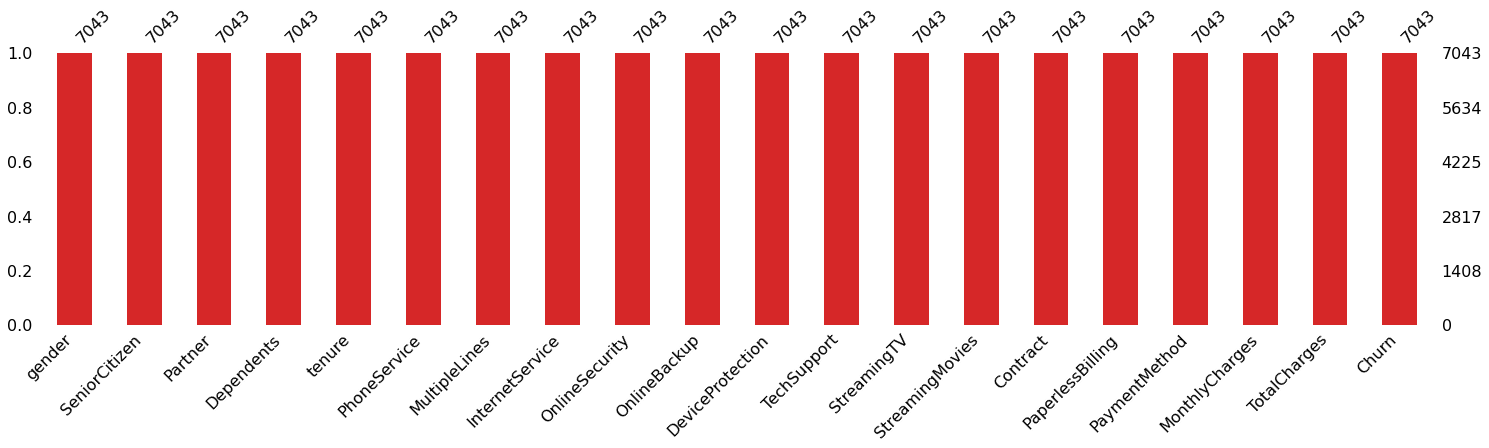

In [13]:
missingno.bar(df, figsize=(25,5), color="tab:red")

In [14]:
print(f"Rows and Columns before dropping duplicates:",df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates:",df.shape)

Rows and Columns before dropping duplicates: (7043, 20)
Rows and Columns after dropping duplicates: (7021, 20)


In [15]:
df.nunique().to_frame("Unique Values")

,Unique Values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [16]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: T

In [17]:
df['TotalCharges'] = df['TotalCharges'].replace(' ','0.0')
df['TotalCharges'].value_counts()

0.0        11
19.75       9
20.2        8
19.65       7
19.9        7
           ..
740.55      1
7432.05     1
141.1       1
1359.5      1
6705.7      1
Name: TotalCharges, Length: 6531, dtype: int64

In [18]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

In [19]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['SeniorCitizen'].dtype

dtype('O')

In [20]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ",object_datatype) 


number_datatype= []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are: ",number_datatype)

Object Data Type Columns are:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Number Data Type Columns are:  ['tenure', 'MonthlyCharges', 'TotalCharges']


Visualization

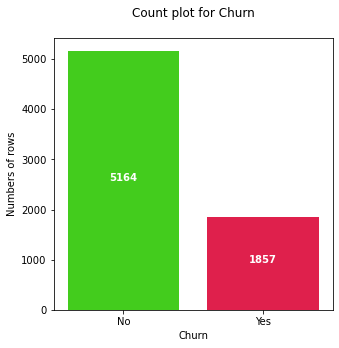

In [21]:
plt.style.use('seaborn-pastel')

try:
    plt.figure(figsize=(5,5))
    col_name = 'Churn'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that "no chrun" values are way higher than "yes churn" data.

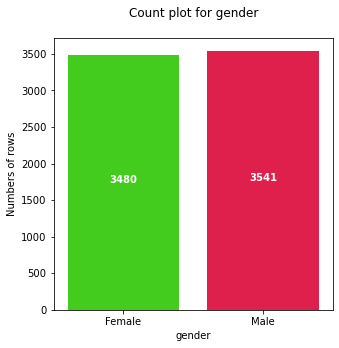

In [22]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'gender'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that the total number of males and females gender almost same still males being at a higher end than female covering the data points in our gender column.

Error: '0'


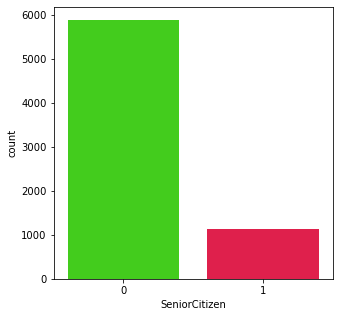

In [23]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'SeniorCitizen'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that the senior citizen values shows 0 to be not resent 1 as being a senior citizen.

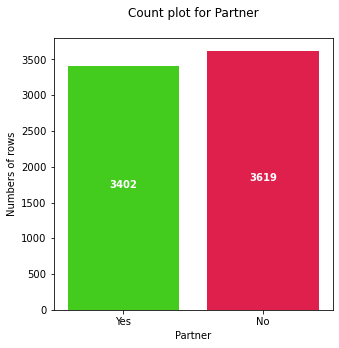

In [24]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Partner'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass   

In the above count plot we see that partner details are almost similar indicatingthat people with no partner are  a bit higher than people who have partners

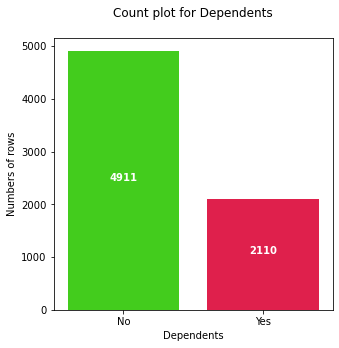

In [25]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Dependents'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass   

In the above count plot we see that people depents are way less that people who do not have any dependent them

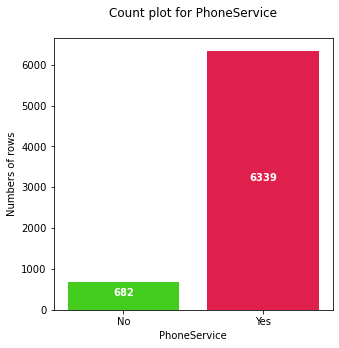

In [26]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PhoneService'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass   

In the above count plot we see that people with phone service cover a larger part while there are few people who do not own a phone service

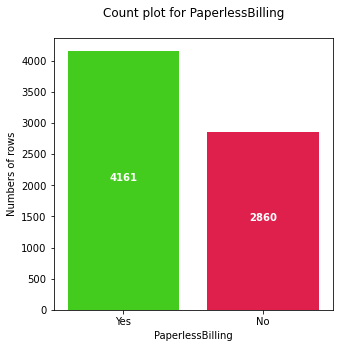

In [27]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PaperlessBilling'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass    

In the above count plot we see that people who prefer paper less billing are i high number however we still have  a huge number of people who prefer receiving a paper bill.

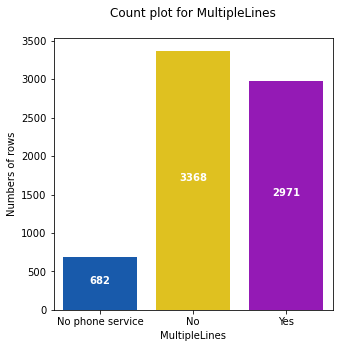

In [28]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'MultipleLines'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that people with single line are higher in number than people who hwve multiple lines but we see a minor people who do not own a phone service yet

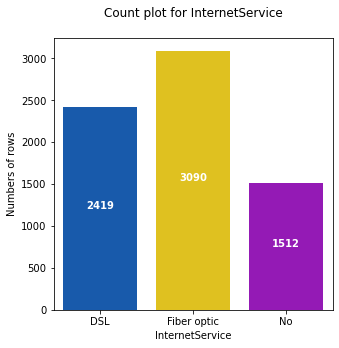

In [29]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'InternetService'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that minority people have choosen to get a high speed of fiber optic but there are many people who do not own an internet service.

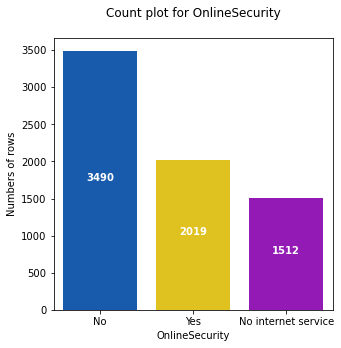

In [30]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'OnlineSecurity'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that people who do not have internet service obvisouly do not need any online security either but there is a huge number in people who own an internet service  but donot use any online security yet

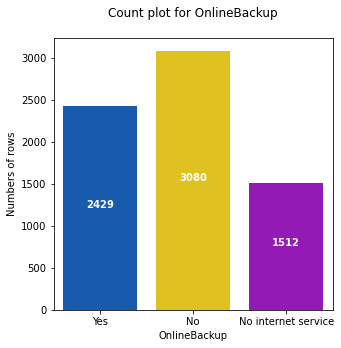

In [31]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'OnlineBackup'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that just like people with no internet service and online security the sme chunk of flokshave no online backup usage either.

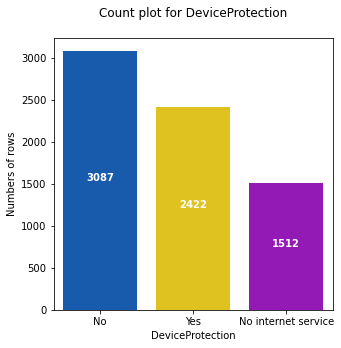

In [32]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'DeviceProtection'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that the people without any device protection is higher in number as compared to people who hwve some kind of device protection.

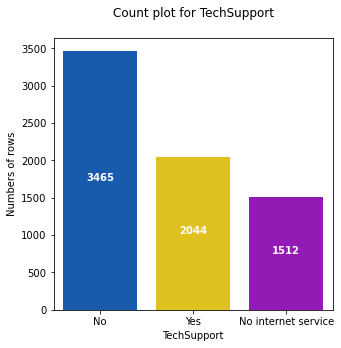

In [33]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'TechSupport'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that people who do not need any technical support is higher in number as compared to people who need technical assistance

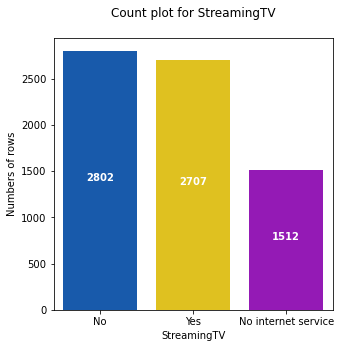

In [34]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'StreamingTV'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that people who do not use streaming tv service higher than the people who do use streaming tv service

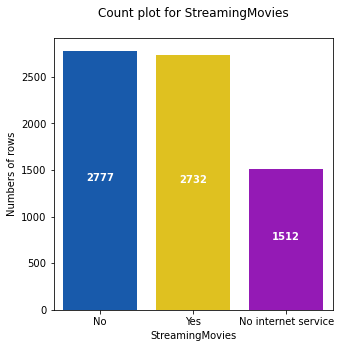

In [35]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'StreamingMovies'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that  service higher than the people who do use streaming movies service

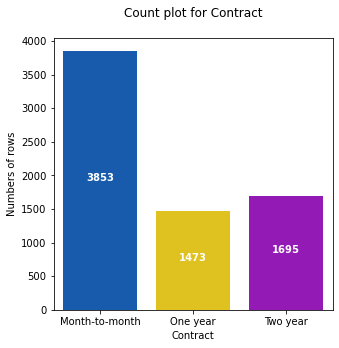

In [36]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'Contract'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that there are a lot of people who prefer the month contract over one year or 2 year contract them. 

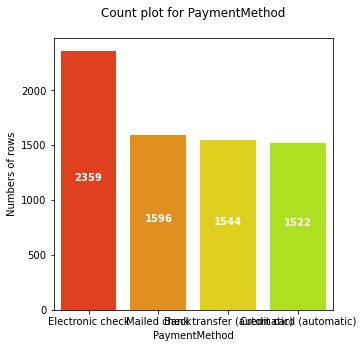

In [37]:
try:
    plt.figure(figsize=(5,5))
    col_name = 'PaymentMethod'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we see that the preffered payment amount by people is the electronic check.

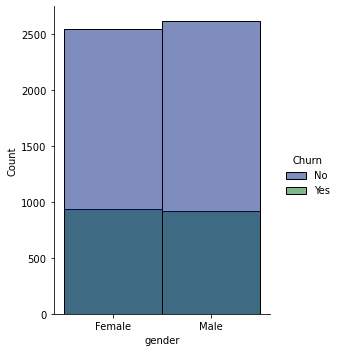

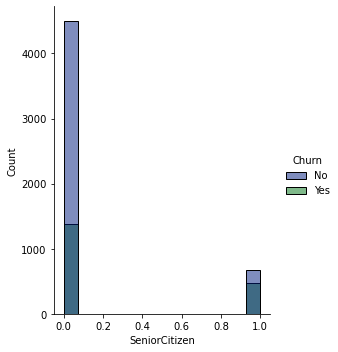

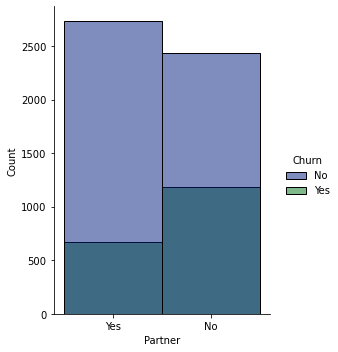

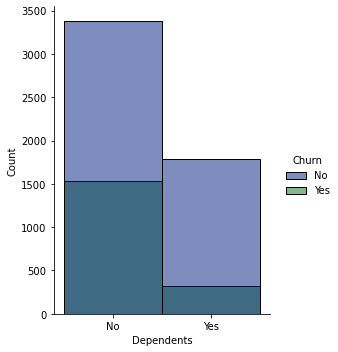

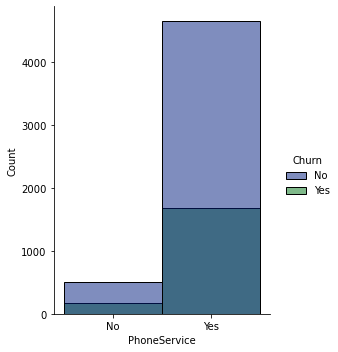

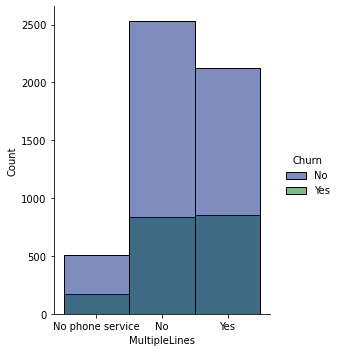

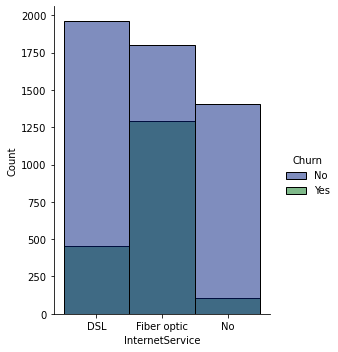

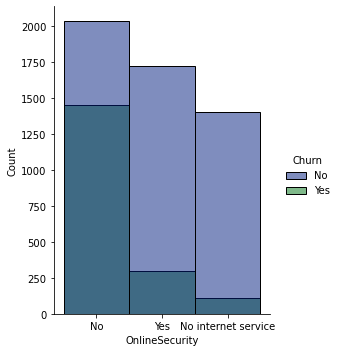

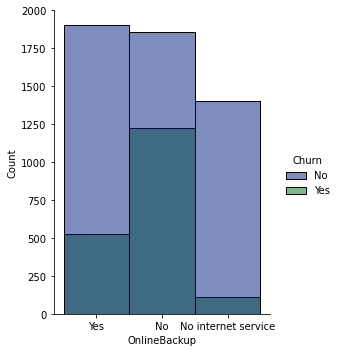

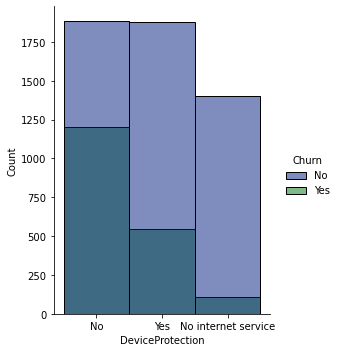

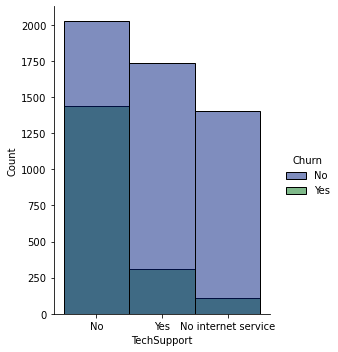

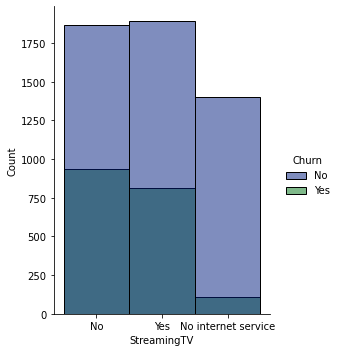

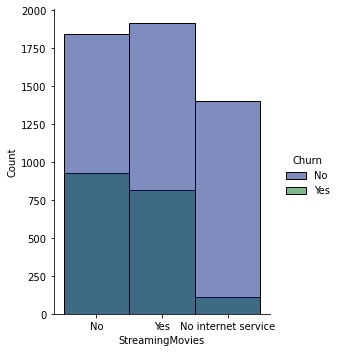

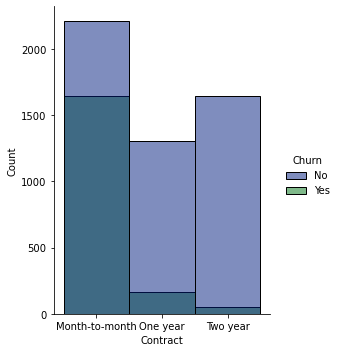

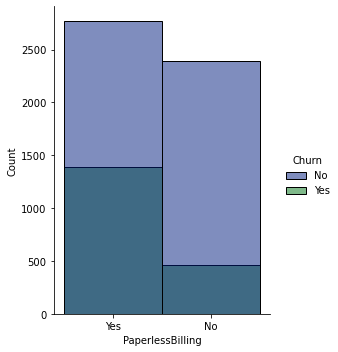

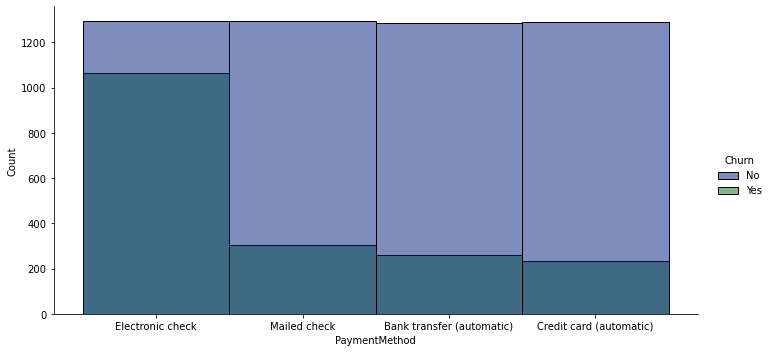

In [38]:
plt.style.use('seaborn-dark-palette')

new_data=object_datatype
new_data.remove('Churn')
new_list=new_data
for col in new_list:
    if col=='PaymentMethod':
        aspect_ratio=2.0
    else:
        aspect_ratio=0.8
    sns.displot(x=col, hue='Churn', data=df, element="bars", aspect=aspect_ratio)

with the help of above bar plot we can identify the no  churn and yes churn and understand that the yes churn option has been significantly lower than it counterpart.

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

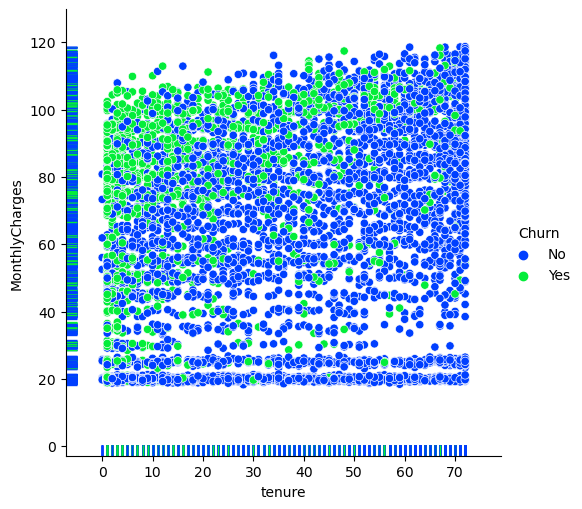

In [42]:
plt.style.use('default')
plt.style.use('seaborn-bright')
              
sns.relplot(data=df,x='tenure',y='MonthlyCharges',hue='Churn')
sns.rugplot(data=df,x='tenure',y='MonthlyCharges',hue='Churn',legend=False)              

The above plot shows that people in the intinal months of service usage are more prone to discontinue if they are unhappy with the service offered t them.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

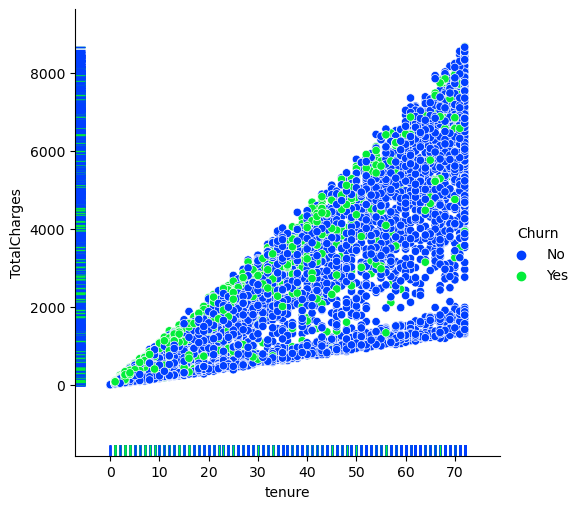

In [43]:
sns.relplot(data=df,x='tenure',y='TotalCharges',hue='Churn')
sns.rugplot(data=df,x='tenure',y='TotalCharges',hue='Churn',legend=False)

The above plot shows that as the tenure increases the total charge increases as well and if people have chosen to spend a high tenure using the service then the churn cirteria is low

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

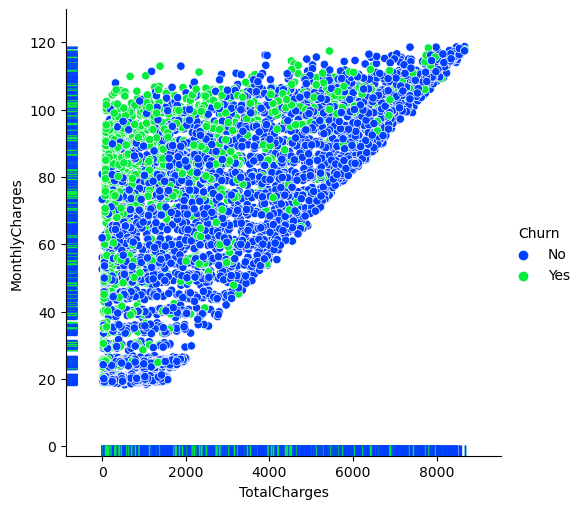

In [44]:
sns.relplot(data=df,x='TotalCharges',y='MonthlyCharges',hue='Churn')
sns.rugplot(data=df,x='TotalCharges',y='MonthlyCharges',hue='Churn',legend=False)

The above plot shows that people with highly monthly charges tend to lave the service and are not able to contribute much to the total charges.

Encoding the categorical object datatype columns

In [46]:
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


I have U sing labelencoder to conert Churn the columns into he numeric formart

In [48]:
oe = OrdinalEncoder()
def ordinal_encode(df,column):
    df[column] = oe.fit_transform(df[column])
    return df
df=ordinal_encode(df,['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                     'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod' ]) 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


I have using oridinal encoder inside a function to apply all the categorical column and convert the feature data type from the object data type to numeric datatype

In [49]:
print(f"Shape of our data frame post enconding is",df.shape)
df.isnull().sum()

Shape of our data frame post enconding is (7021, 20)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

SEE THE DATA VALUE AFTER APPLYING DATA ENCODING

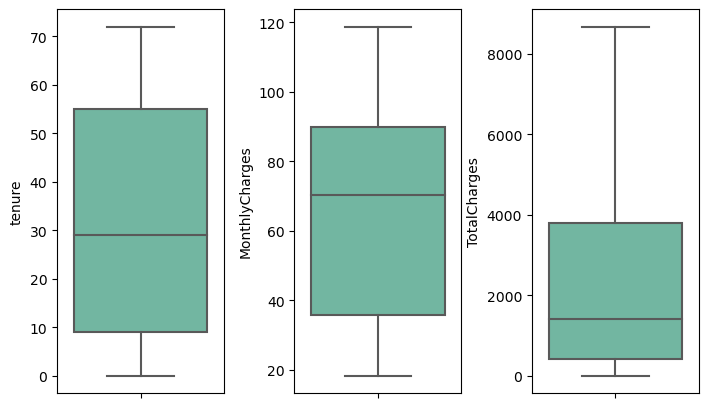

In [50]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

With the help of boxplot we can see the outliers details present in our  data columns which will need to be treated.

In [51]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959910
Churn               1.068139
dtype: float64

I  am checking the numbers of rows and columns present in our dataset after applying the encoding techniques and ensuring that there are no null values presenting them.

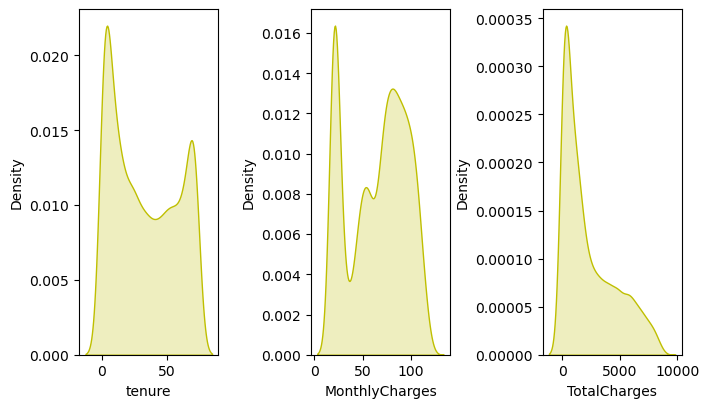

In [52]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade":True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

With the help of distribution plot we can see the skewness details present in our  data columns which will need to be treated

USING LOG TRANSFORM TO FIX SKEWNESS

In [53]:
for col in number_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

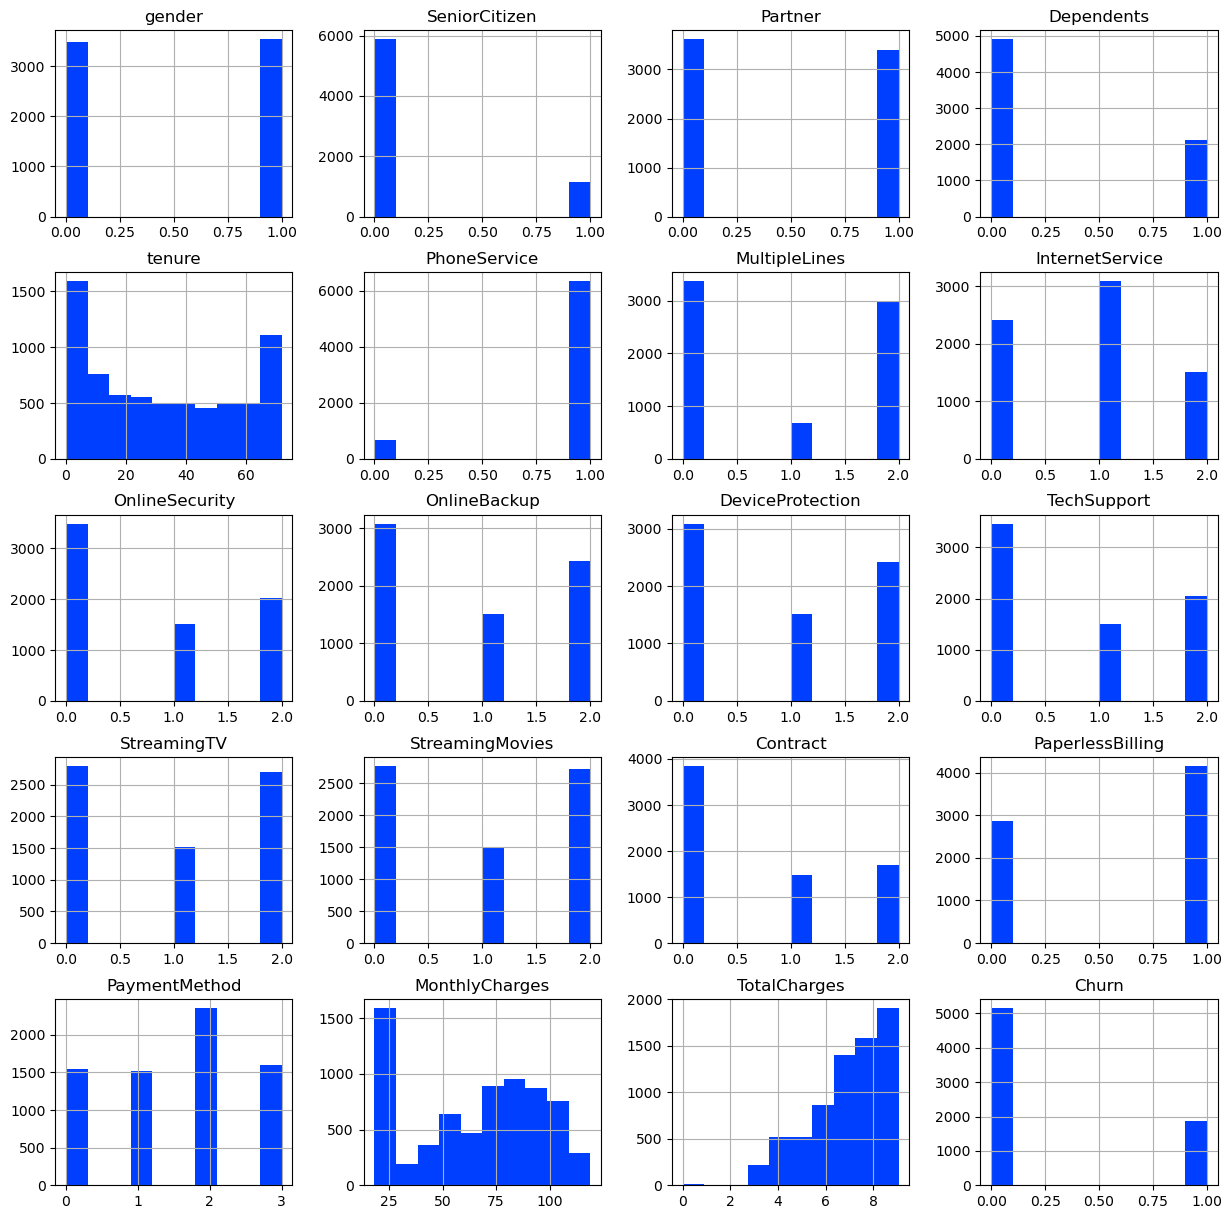

In [54]:
df.hist(figsize=(15,15))
plt.show()

I have generated a histogram for all our dataset columns after applying encoding and converting object datatype to numeric datatype values.

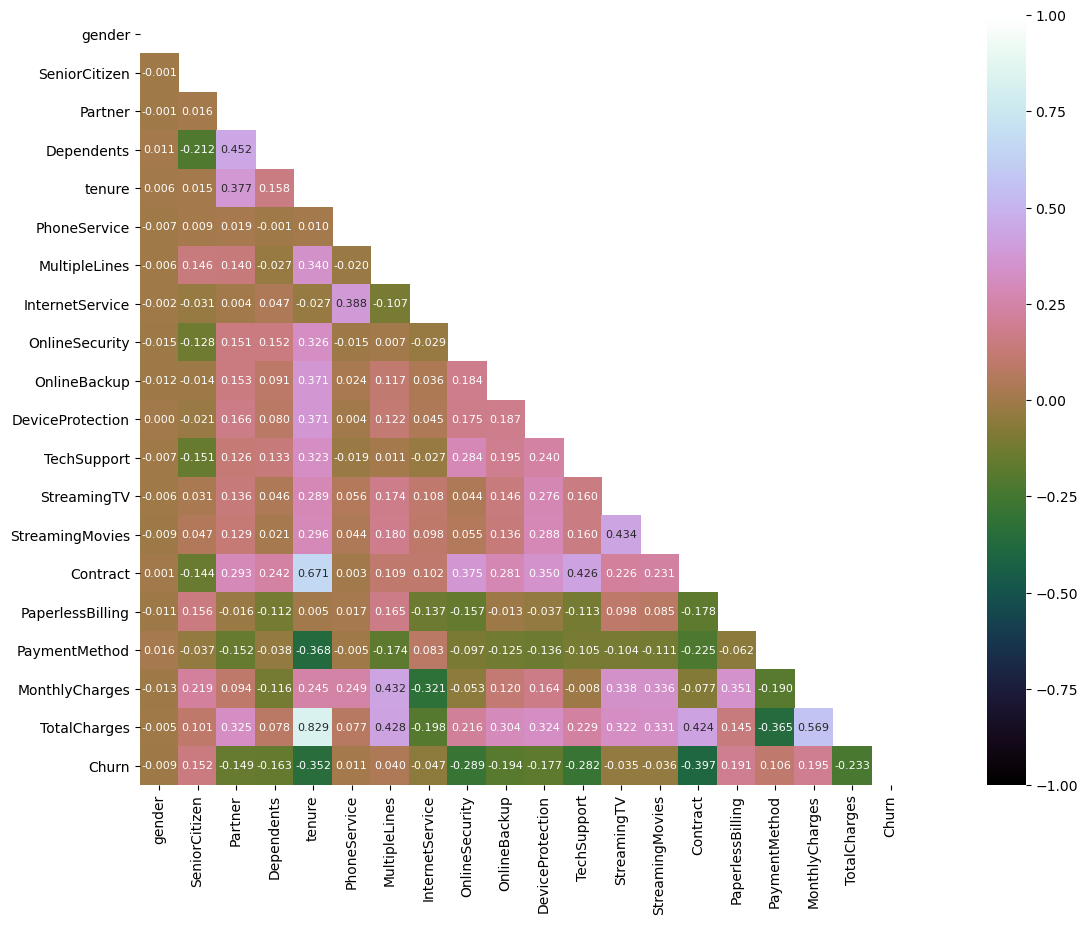

In [55]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':8}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In the above heat map we can see that correlation details plus we can determine that there is no multi colinearity issue between our columns.

Corelation bar plot comparing features with our labels

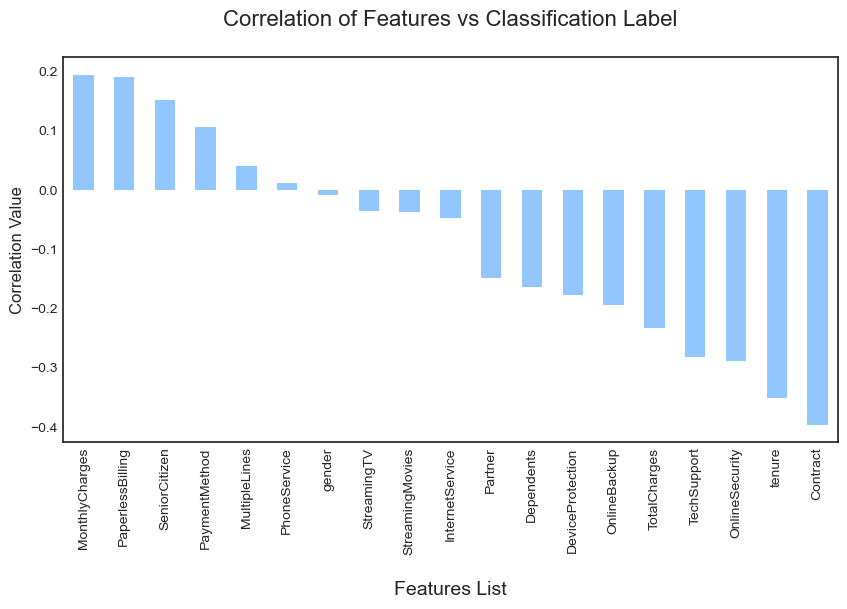

In [57]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [ ]:
Splitting the dataset into 2 variables

In [58]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

X represent the feature column and Y represent the target column.

In [59]:
Y.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category.

In [60]:
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)

Here we use over sample method in smote to solve the data imbalance issue

In [61]:
Y.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

Here we see that we can slove the dat imblance issure by using over sampling technique.

Feature scaling

In [62]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.047842,-0.518542,1.173966,-0.603253,-1.107178,-3.153328,0.023914,-1.272520,-0.783864,1.377124,-0.923381,-0.788038,-1.077843,-1.075668,-0.669420,0.762681,0.358660,-1.327856,-2.059531
1,1.039896,-0.518542,-0.922819,-0.603253,0.265543,0.321301,-1.043871,-1.272520,1.646696,-0.920604,1.370987,-0.788038,-1.077843,-1.075668,0.639268,-1.400754,1.372701,-0.384491,0.499929
2,1.039896,-0.518542,-0.922819,-0.603253,-1.065580,0.321301,-1.043871,-1.272520,1.646696,1.377124,-0.923381,-0.788038,-1.077843,-1.075668,-0.669420,0.762681,1.372701,-0.492403,-1.273690
3,1.039896,-0.518542,-0.922819,-0.603253,0.723117,-3.153328,0.023914,-1.272520,1.646696,-0.920604,1.370987,1.633250,-1.077843,-1.075668,0.639268,-1.400754,-1.669423,-0.894465,0.483681
4,-1.047842,-0.518542,-0.922819,-0.603253,-1.065580,0.321301,-1.043871,0.216566,-0.783864,-0.920604,-0.923381,-0.788038,-1.077843,-1.075668,-0.669420,0.762681,0.358660,0.094154,-1.065085


Finding best random state for building classification models

In [63]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test,pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i
        
print("Best accuracy score is",maxAccu,"on Random State",maxRS)

Best accuracy score is 79.35708752904725 on Random State 692


,Importance
Features,
Contract,0.147
TotalCharges,0.121
MonthlyCharges,0.121
tenure,0.120
TechSupport,0.062
OnlineSecurity,0.060
PaperlessBilling,0.058
PaymentMethod,0.057
Partner,0.039


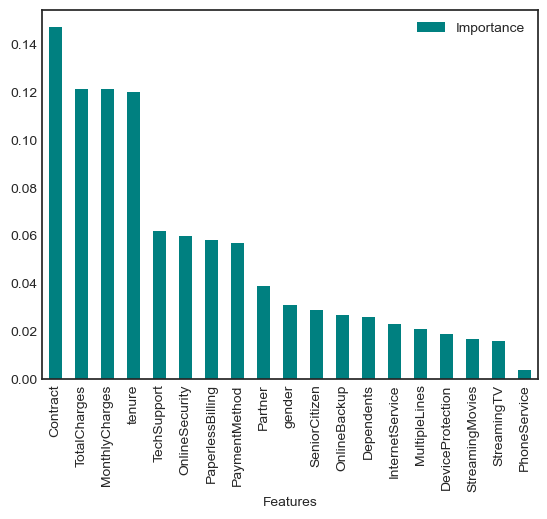

In [64]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
importances = pd.DataFrame({'Features':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

with the help of randomforestclassifier we are able to list down the importance or priority given to a column as per its involvement.

MACHINE LEARNING MODEL FOR CLAASSIFICATION WITH EVALUTION MATRICS

In [66]:
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=692)
    
    model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n",class_report)
    
    acc_score = (accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    
    cv_score = (cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

I have defined the class with the help of train test split ,training of machine learning model.

In [67]:
#Logistic Regression

model=LogisticRegression()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1266
           1       0.79      0.81      0.80      1316

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582

Accuracy Score: 79.35708752904725
Cross Validation Score: 76.95590782623778

Accuracy Score - Cross Validation Score is 2.401179702809472


In [68]:
#support vector classifier

model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1266
           1       0.85      0.84      0.84      1316

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582

Accuracy Score: 84.27575522850503
Cross Validation Score: 82.2240072756423

Accuracy Score - Cross Validation Score is 2.0517479528627405


In [69]:
#DecisionTreeClassifier


model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1266
           1       0.81      0.82      0.82      1316

    accuracy                           0.81      2582
   macro avg       0.81      0.81      0.81      2582
weighted avg       0.81      0.81      0.81      2582

Accuracy Score: 81.40975987606507
Cross Validation Score: 80.73324129395797

Accuracy Score - Cross Validation Score is 0.6765185821070929


In [70]:
#RandomForestClassifier


model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1266
           1       0.89      0.86      0.87      1316

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582

Accuracy Score: 87.21920991479473
Cross Validation Score: 84.69348778446847

Accuracy Score - Cross Validation Score is 2.5257221303262583


In [71]:
#KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76      1266
           1       0.75      0.89      0.81      1316

    accuracy                           0.79      2582
   macro avg       0.80      0.79      0.79      2582
weighted avg       0.80      0.79      0.79      2582

Accuracy Score: 79.08597986057319
Cross Validation Score: 77.30458548293716

Accuracy Score - Cross Validation Score is 1.7813943776360333


In [72]:
#ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1266
           1       0.89      0.85      0.87      1316

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582

Accuracy Score: 87.33539891556933
Cross Validation Score: 85.88429291023347

Accuracy Score - Cross Validation Score is 1.451106005335859


In [73]:
#XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1266
           1       0.89      0.84      0.87      1316

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582

Accuracy Score: 86.75445391169636
Cross Validation Score: 83.85139313079982

Accuracy Score - Cross Validation Score is 2.9030607808965385


HYPER PARAMETER TUNING ON THE BEST CLASSIFICATION ML MODEL

In [74]:
fmod_param = {'criterion' : ['gini', 'entropy'],
             'n_jobs':[-2, -1, 1],
             'random_state':[42,692, 1000],
             'max_depth':[0, 15, 30],
             'n_estimators':[100, 200, 300] 
             }

In [ ]:
After comparing all the classifiaction model i have selected to extra trees classifier as my best model considering the accuracy score with the cross validation score against it

In [75]:
GSCV = GridSearchCV(ExtraTreesClassifier(),fmod_param,cv=5)

In [76]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 692, 1000]})

I have trained the grid search cv with the list of parameters i feel it should come best possible outcomes

In [77]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 692}

here provides the best parameters

In [78]:
Final_Model = ExtraTreesClassifier(criterion='gini',max_depth=15,n_estimators=300,n_jobs=-2,random_state=692)
Classifier = Final_Model.fit(X_train,Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test,fmod_pred))*100
print("Accuracy score for the Best Model is:",fmod_acc)

Accuracy score for the Best Model is: 87.06429124709527


I have sucessfully incorporated the hyper parameter turning on my final model and received the accuracy score for it.

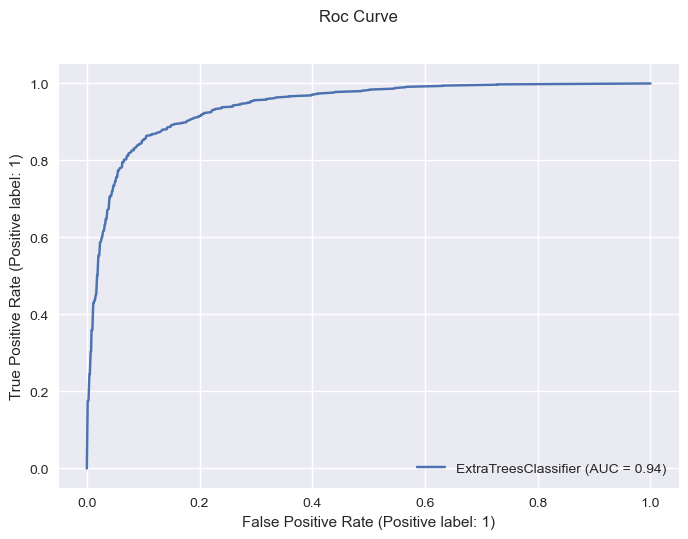

In [79]:
plt.style.use('seaborn')
disp=metrics.plot_roc_curve(Final_Model,X_test,Y_test)
disp.figure_.suptitle("Roc Curve")
plt.show()

I have generated the roc curve for my final model and its shows the auc score for my model to be 94%

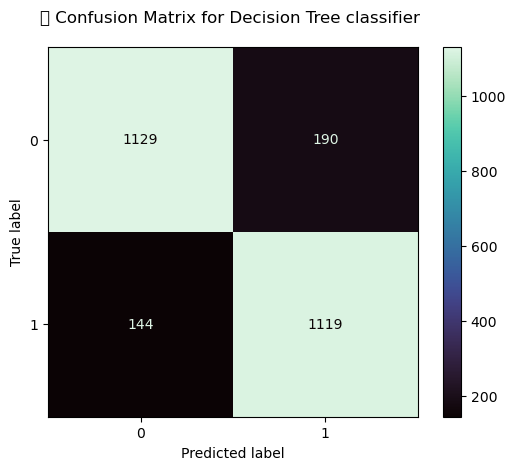

In [80]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier,X_test,Y_test,cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree classifier \n')
plt.show()

With the help of confusion matrix i am able to understand the numbers of times i got the correct outputs .

In [81]:
filename = "FinalModel_E09.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E09.pkl']

Finally i saving my best classification model by using joblib